<a href="https://colab.research.google.com/github/nithin2104/Image_Classification/blob/main/image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("ice cream cone",limit=20,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://phandroid.s3.amazonaws.com/wp-content/uploads/2010/10/ice-cream1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://addapinch.com/wp-content/uploads/2014/05/Cinnamon-Ice-Cream-0348.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://img1.mashed.com/img/gallery/national-ice-cream-day-2020-where-to-get-the-best-freebies-and-deals/intro-1594424339.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://etc.usf.edu/clipart/5300/5358/cone_1_md.gif
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/736x/fa/32/07/fa32073dddd4927646ded7dd2a8368fe.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.doyouremember.co.uk/uploads/W2YrgIV811138666_467075566790990_8064308684721678494_n.jpg
[Error]Invalid image, not saving https://www.doyouremember.co.uk/uploads/W2YrgIV811138666_467075566790990_8064308684721678494_n.jpg

[!] Issue ge

In [ ]:
downloader.download("car",limit=10,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://papers.co/wallpaper/papers.co-bf26-bmw-rainbow-blue-purple-car-art-34-iphone6-plus-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://forumcinemaslv.blob.core.windows.net/1012/Event_5606/gallery/6244743498.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://s1.cdn.autoevolution.com/images/news/gallery/fast-furious-9-gets-first-character-posters-rev-your-engines_5.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://creepshots.org/wp-content/uploads/2017/09/sister-cleaning-car-6.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://breakbrunch.com/wp-content/uploads/2019/11/sexy-asian-car-model-112619-7.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://thumbs.dreamstime.com/x/vintage-classic-car-hot-rod-10495168.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://scandalplanet.com/wp-content/uploads/2018/11

In [ ]:
downloader.download("ice cream cone",limit=15,output_dir='images',adult_filter_off=True)

NameError: ignored

In [12]:
#preprocessing
#1 resize
#2 flatten
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['ice cream cone','red rose','strawberry']

for i in CATEGORIES:
  class_num = CATEGORIES.index(i) #lable encoding the values
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))  
    #print(img_array)
    #plt.imshow(img_array)
    img_resize = resize(img_array,(150,150,3))#normalizes the value from 0 to 1
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)


flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [15]:
len(flat_data[0])

67500

In [16]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

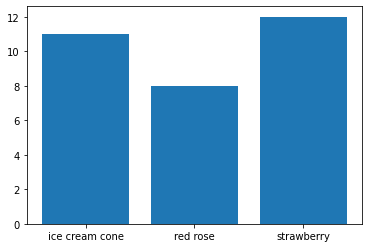

In [19]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [30]:
#split data into Traning and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[10,0.001,0.0001],'kernel':['rbf']},
             ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [10, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 2, 0, 2, 2, 0, 1, 2, 2])

In [36]:
y_test

array([0, 0, 2, 0, 2, 0, 0, 1, 2, 2])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7

In [38]:
confusion_matrix(y_pred,y_test)

array([[2, 0, 0],
       [0, 1, 0],
       [3, 0, 4]])

In [39]:

#save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [40]:
model =pickle.load(open('img_model.p','rb'))

Enter your URLhttps://tse1.mm.bing.net/th?id=OIP.r6js7ZSS1xrJMy67DZK97wHaE8&pid=Api&rs=1&c=1&qlt=95&w=163&h=109
(109, 163, 3)
PREDICTED OUTPUT:ice cream cone


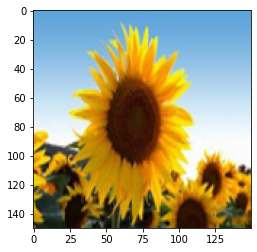

In [58]:
#testing a brand new image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [1]:
#!pip install streamlit
#!pip install pyngrok
from pyngrok import ngrok


In [2]:
#Deployment
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.title('Image Classifier Using Machine Learning')
st.text('Upload the Image')
model = pickle.load(open('img_model.p','rb'))
uploaded_file = st.fileuploader("Choose an image....",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  
  if st.button('PREDICT'):
    CATEGORIES = ['ice cream cone','red rose','strawberry']
    st.write('Result....')
    flat_data=[]
    img = np.array(img)
    img_resize = resize(img,(150,150,3))
    flat_data.append(img_resize.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT:{y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}')



Overwriting app.py


In [3]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
NgrokTunnel: "http://0c630c61e023.ngrok.io" -> "http://localhost:80"
